In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
data = sb.load_dataset('tips')

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
data.shape

(244, 7)

In [5]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Insights:
No missing values are found.
The dataset has 7 columns and 244 rows.
## Key statistics:
Average total bill: $19.78
Average tip: $2.99
Group sizes range from 1 to 6.


In [6]:
# How many weekdays are present in the dataset
data['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [7]:
data.time.unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [8]:
time_unique = data.time.unique()

In [9]:
data.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [10]:
# how many dinners and lunches data are present in the dataset 
time_value = data.time.value_counts()
time_value
# insight:- there are twice the number of dinners as compare to lunches

time
Dinner    176
Lunch      68
Name: count, dtype: int64

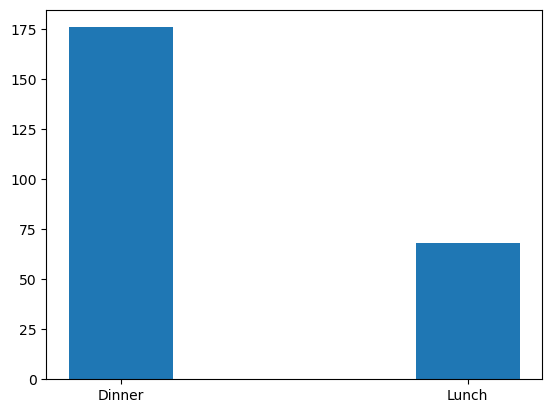

In [11]:
plt.bar(time_unique,time_value,width = 0.3)
plt.show()

<Axes: xlabel='time'>

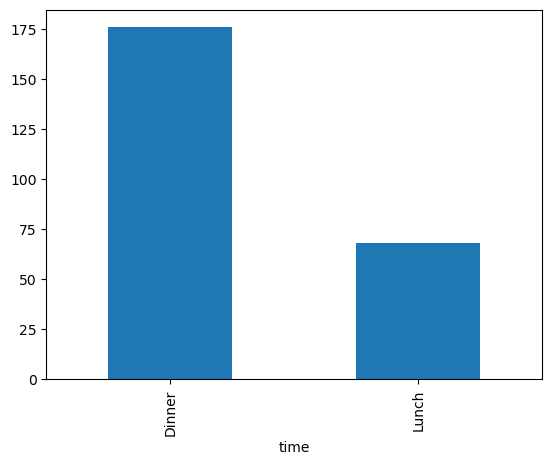

In [12]:
data.time.value_counts().plot(kind='bar')
# another method to plot

In [13]:
# when does people pay more tips like: dinner or lunch?
# this is the example of single dimension .groupby funtion
data.groupby(['time'])['tip'].mean() # here we are grouping time with tip it means that we are getting the average tip given in that particular time(dinner or lunch)

# insight:- in dinner we are gettting avg tip  3.1 dollars whereas in lunch it is 2.7 dollars

C:\Users\Acer\AppData\Local\Temp\ipykernel_36880\3172551022.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['time'])['tip'].mean() # here we are grouping time with tip it means that we are getting the average tip given in that particular time(dinner or lunch)


time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
time_avg_tip = data.groupby(['time'])['tip'].mean()

<Axes: xlabel='time'>

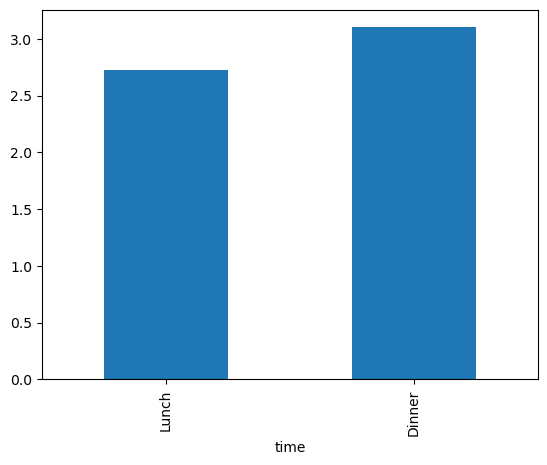

In [16]:
time_avg_tip.plot(kind='bar') 

# ploting avg tip given in particular time in bar graph

In [17]:
data.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

<Axes: xlabel='sex'>

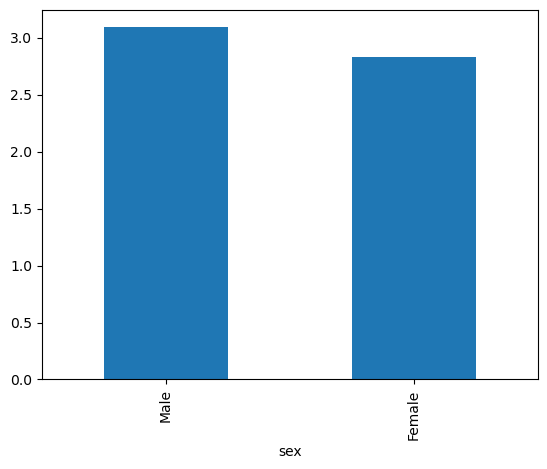

In [18]:
sex_avg_tip = data.groupby(['sex'])['tip'].mean()
sex_avg_tip.plot.bar()

In [19]:
data.groupby(['day'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

<Axes: xlabel='day'>

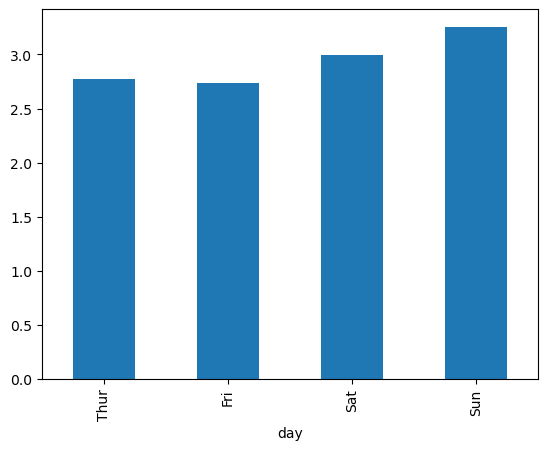

In [20]:
day_avg_tip = data.groupby(['day'])['tip'].mean()
day_avg_tip.plot.bar()

In [21]:
data.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

<Axes: xlabel='size'>

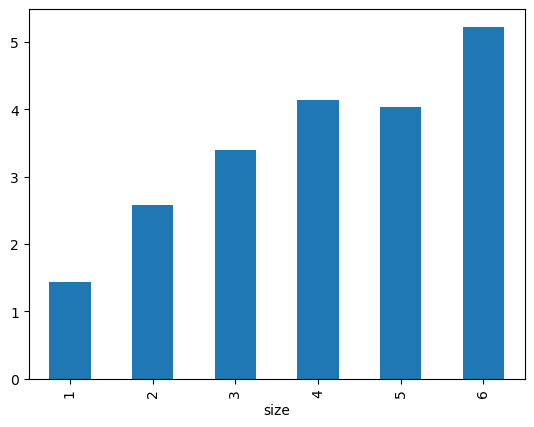

In [22]:
size_avg_tip = data.groupby(['size'])['tip'].mean()
size_avg_tip.plot.bar()

In [23]:
data.groupby(['sex','smoker'])['tip'].mean()

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

In [24]:
data.groupby(['sex','smoker'])['tip'].mean().unstack() # this is to show in a better pivot structure

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


<Axes: xlabel='sex,smoker'>

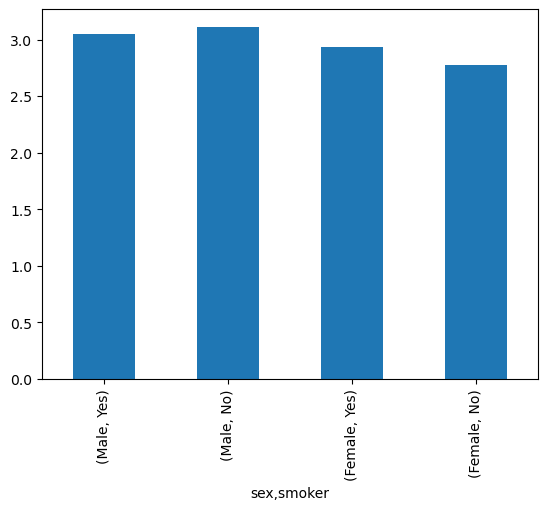

In [25]:
smoker_sex_avgtip = data.groupby(['sex','smoker'])['tip'].mean()
smoker_sex_avgtip.plot.bar()

In [26]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [27]:
data.groupby(['day','time'])['tip'].mean().unstack()

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


In [28]:
data.groupby(['day','smoker'])['tip'].mean().unstack()

smoker,Yes,No
day,,
Thur,3.030000,2.673778
Fri,2.714000,2.812500
Sat,2.875476,3.102889
Sun,3.516842,3.167895


In [29]:
data.groupby(['day','size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


In [30]:
data.groupby(['smoker','size'])['tip'].mean().unstack()

size,1,2,3,4,5,6
smoker,,,,,,
Yes,1.460,2.709545,4.095000,3.992727,2.500000,NaN
No,1.415,2.489000,3.069231,4.195769,5.046667,5.225


In [31]:
# how much percentage of tips to the total bill given?

data['tips_percentage'] = (data.tip/data.total_bill)*100

In [32]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


<Axes: xlabel='total_bill', ylabel='tip'>

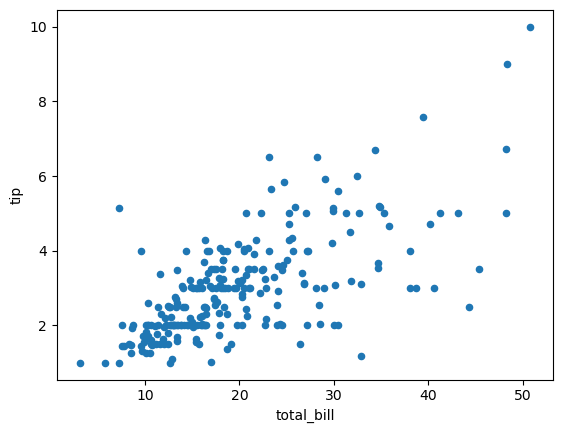

In [33]:
# visualising the relationship between total bill and tips

data.plot.scatter(x='total_bill',y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

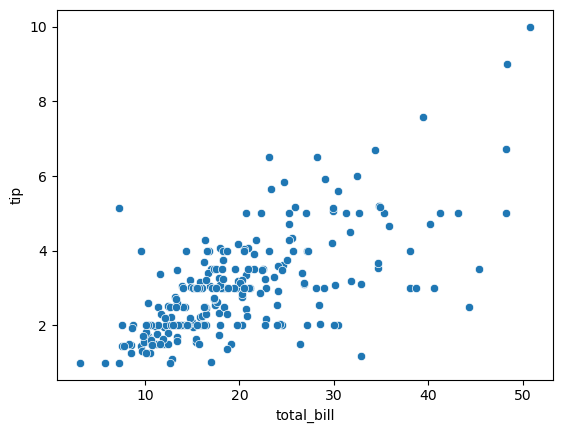

In [34]:
sb.scatterplot(x='total_bill',y='tip',data = data)

In [35]:
data.head()

,total_bill,tip,sex,smoker,day,time,size,tips_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [36]:
corr_data = data.describe()
corr_data

,total_bill,tip,size,tips_percentage
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,16.080258
std,8.902412,1.383638,0.951100,6.107220
min,3.070000,1.000000,1.000000,3.563814
25%,13.347500,2.000000,2.000000,12.912736
50%,17.795000,2.900000,2.000000,15.476977
75%,24.127500,3.562500,3.000000,19.147549
max,50.810000,10.000000,6.000000,71.034483


In [37]:
data.isnull().sum()

total_bill         0
tip                0
sex                0
smoker             0
day                0
time               0
size               0
tips_percentage    0
dtype: int64

In [38]:
corr_data.corr()

,total_bill,tip,size,tips_percentage
total_bill,1.000000,0.989443,0.987291,0.995167
tip,0.989443,1.000000,0.999883,0.973796
size,0.987291,0.999883,1.000000,0.970286
tips_percentage,0.995167,0.973796,0.970286,1.000000


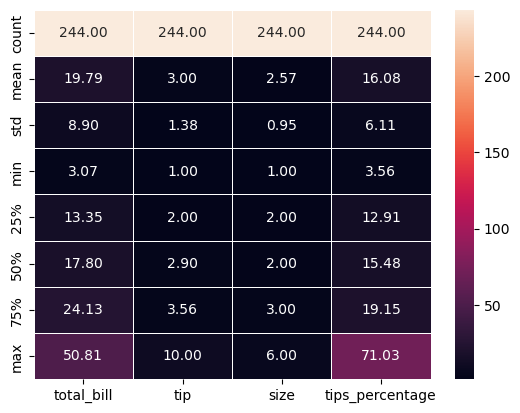

In [39]:
sb.heatmap(corr_data,annot=True,fmt=".2f", linewidth=.5)
plt.show()

## Distribution of Total Bill and Tips
## Theory:
Histograms and KDE plots help understand the distribution of numerical data.

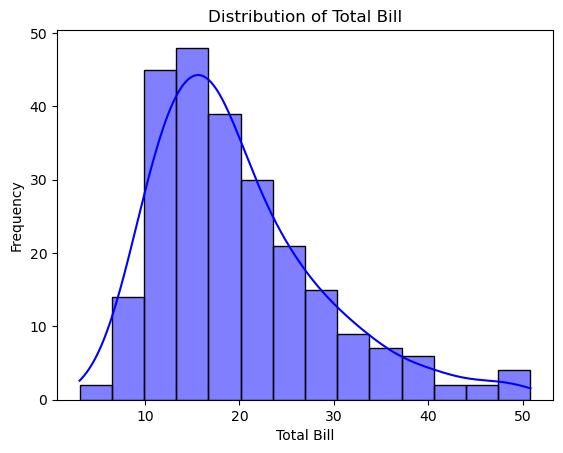

In [40]:
# Total Bill Distribution
# plt.figure(figsize=(8, 6))
sb.histplot(data['total_bill'], kde=True, color='blue')
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()



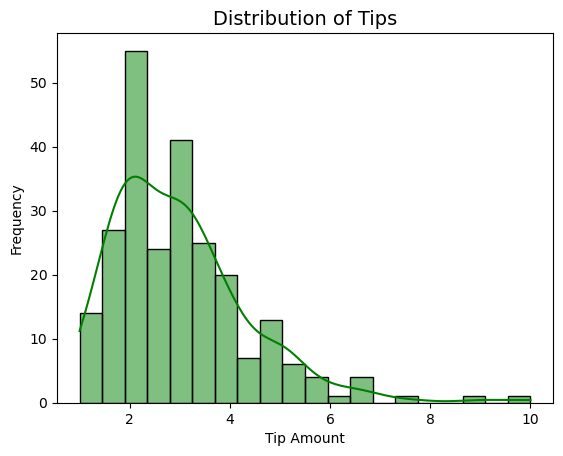

In [41]:
# Tip Distribution
sb.histplot(data['tip'], kde=True, bins=20, color='green')
plt.title("Distribution of Tips", fontsize=14)
plt.xlabel("Tip Amount")
plt.ylabel("Frequency")
plt.show()

count    244.000000
mean      16.080258
std        6.107220
min        3.563814
25%       12.912736
50%       15.476977
75%       19.147549
max       71.034483
Name: tips_percentage, dtype: float64


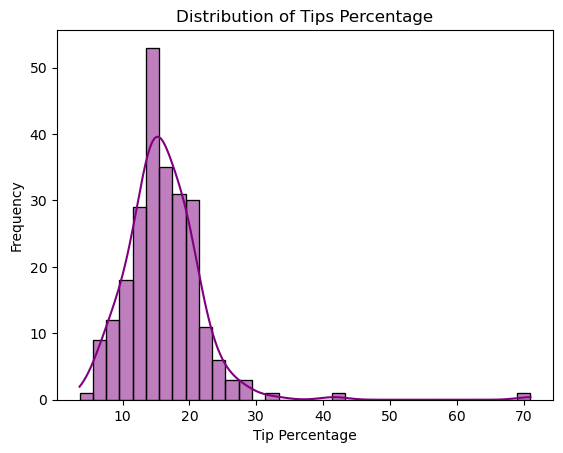

In [42]:
print(data['tips_percentage'].describe())

# Visualize tip percentage
sb.histplot(data['tips_percentage'], kde=True, color='purple')
plt.title("Distribution of Tips Percentage")
plt.xlabel("Tip Percentage")
plt.ylabel("Frequency")
plt.show()

# Gender-Based Tipping Analysis

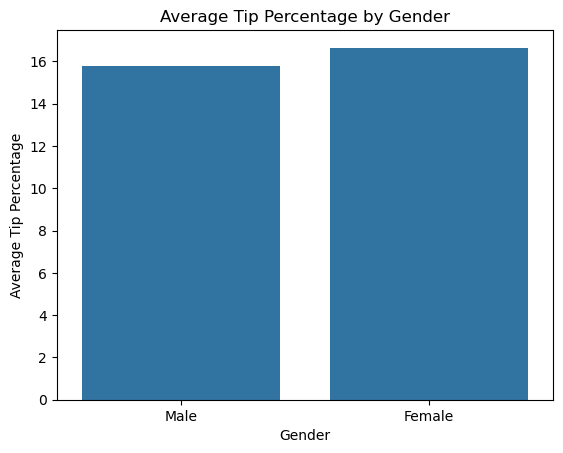

In [43]:
# Average Tip Percentage by Gender
sb.barplot(x='sex', y='tips_percentage', data=data, ci=None)
plt.title("Average Tip Percentage by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Tip Percentage")
plt.show()


In [44]:
data.groupby(['sex'])['tips_percentage'].mean()

sex
Male      15.765055
Female    16.649074
Name: tips_percentage, dtype: float64

In [45]:
data.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

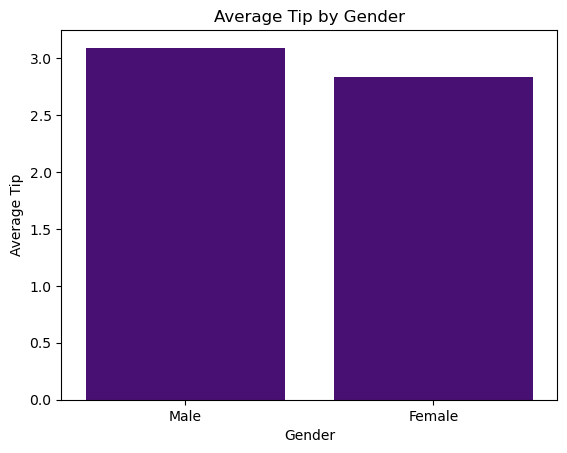

In [46]:
sb.barplot(x='sex', y='tip', data=data, ci=None, color = 'indigo')
plt.title("Average Tip by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Tip")
plt.show()

## Impact of Smoking on Tipping Behavior

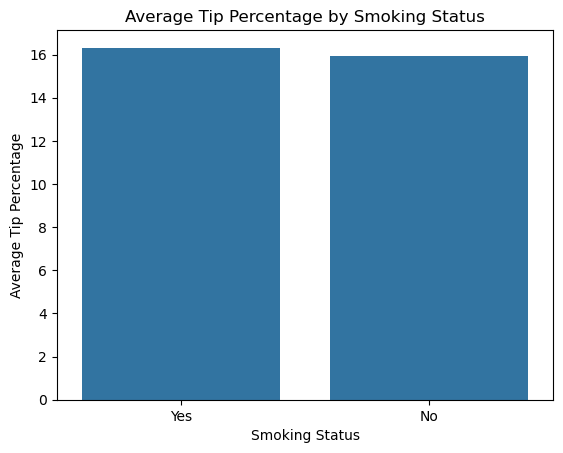

In [47]:
# Average Tip Percentage by Smoking Status
sb.barplot(x='smoker', y='tips_percentage', data=data, ci=None)
plt.title("Average Tip Percentage by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Average Tip Percentage")
plt.show()

## Relationship Between Total Bill and Tip


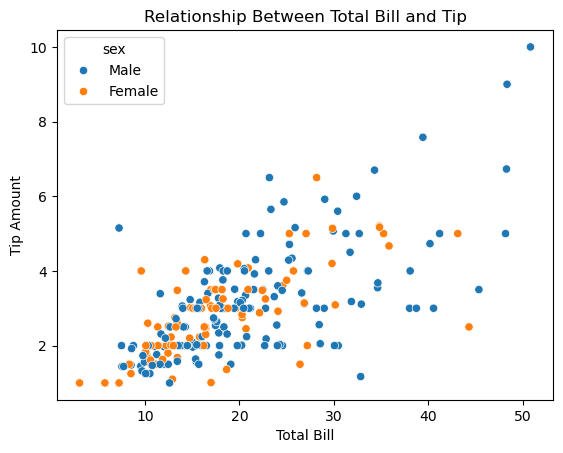

In [48]:
# Scatter Plot with Regression Line
sb.scatterplot(x='total_bill', y='tip', data=data, hue='sex')
# sb.regplot(x='total_bill', y='tip', data=data, scatter=False, color='red')
plt.title("Relationship Between Total Bill and Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()


## Tips by Day of the Week

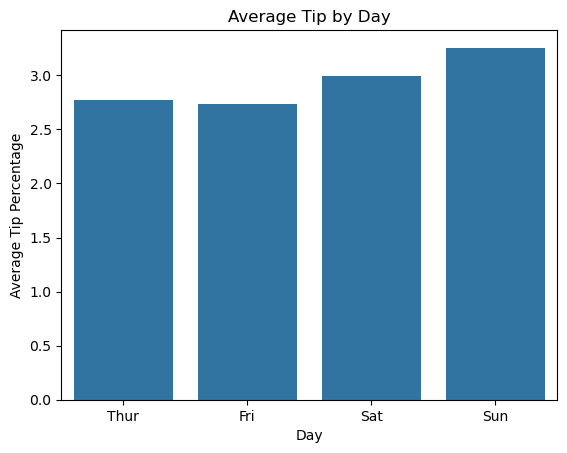

In [49]:
# Average Tip Percentage by Day
sb.barplot(x='day', y='tip', data=data, ci=None)
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip Percentage")
plt.show()


## Insights Based on Time (Lunch vs. Dinner)

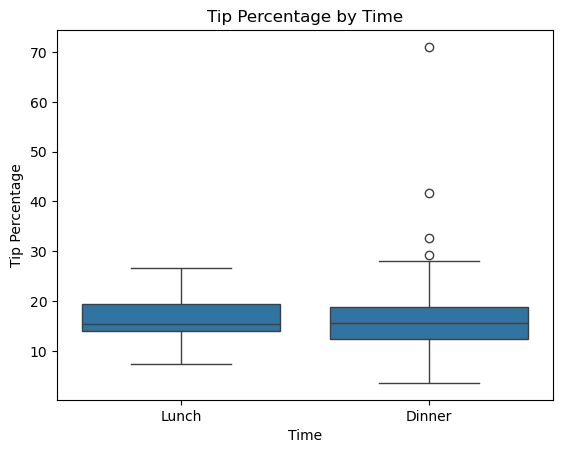

In [50]:
# Tips by Time (Lunch vs. Dinner)
sb.boxplot(x='time', y='tips_percentage', data=data)
plt.title("Tip Percentage by Time")
plt.xlabel("Time")
plt.ylabel("Tip Percentage")
plt.show()


## Group Size and Tips

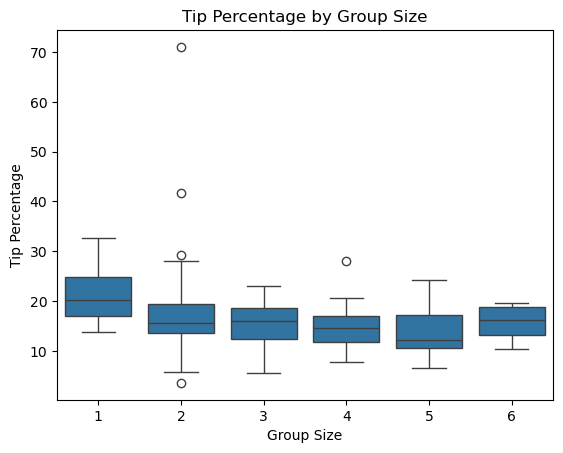

In [51]:
# Tips by Group Size
sb.boxplot(x='size', y='tips_percentage', data=data)
plt.title("Tip Percentage by Group Size")
plt.xlabel("Group Size")
plt.ylabel("Tip Percentage")
plt.show()

# Conclusion
The analysis gave insights such as:

1: Larger bills lead to higher tips

2: Females and non-smokers tip slightly more.

3: Dinner and weekends see higher tips.

In [52]:
import warnings 
warnings.filterwarnings('ignore')